In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def bezier(p0,p1,p2):
    ti=np.roots([np.linalg.norm(p2-p0)**2,
                 3*np.dot(p2-p0,p0-p1),
                 np.dot(3*p0-2*p1-p2,p0-p1),
                 -np.linalg.norm(p0-p1)**2])
    for i in ti:
        if isinstance(i,complex) and i.imag<0.01:
            i=i.real
            if i>0 and i<1:
                ti=i
                break
    if(isinstance(ti,float)==False):
        raise Exception(f"Error compute t_i:{ti}")
        
    b1=(p1-(1-ti)**2*p0-ti**2*p2)/(2*(1-ti)*ti)
    
    def _bezier(t):
        if isinstance(t,float):
            return (1-t)**2 * p0+2*(1-t)*t*b1 + t**2*p2
        elif isinstance(t,np.ndarray):
            ans = np.zeros((len(t),len(p0)))
            for index,i in enumerate(t):
                ans[index,:]= _bezier(i)
            return ans
        else:
            raise Exception("type error")
    
    return _bezier

In [3]:
def bezier_interpolate(pts,circle=False):
    if isinstance(pts,np.ndarray)==False:
        pts=np.array(pts)
    
    n=len(pts)
    bezier_functions=[]
    for i in range(n-2):
        bezier_functions.append(bezier(pts[i],pts[i+1],pts[i+2]))
    if circle:
        bezier_functions.append(bezier(pts[-2],pts[-1],pts[1]))
        
    def scaled_bezier(func):
        def _scaled_bezier(theta):
            return func(theta/math.pi)
        return _scaled_bezier
    for i,func in enumerate(bezier_functions):
        bezier_functions[i]= scaled_bezier(func)
    
    def blend(f1,f2):
        def _blend(theta):
            if isinstance(theta,float):
                return math.cos(theta)**2 * f1(theta+math.pi/2) + math.sin(theta)**2 * f2(theta)
            elif isinstance(theta,int):
                return _blend(float(theta))
            elif isinstance(theta,np.ndarray):
                return np.array(tuple(_blend(_theta) for _theta in theta))
            else:
                raise Exception('type error.')
        return _blend
    
    C_functions = []
    if circle:
        C_functions.append(blend(bezier_functions[-1],bezier_functions[0]))
    else:
        C_functions.append(bezier_functions[0])
    for i in range(0,len(bezier_functions)-1):
        C_functions.append(
            blend(bezier_functions[i],bezier_functions[i+1])
        ) # theta in [0,pi/2]
    if not circle:
        def _f_last(theta):
            return bezier_functions[-1](theta+math.pi/2)
        C_functions.append(_f_last)
    
    return C_functions

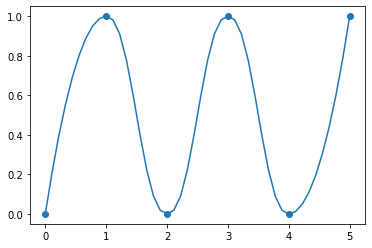

In [4]:
pts = np.array([[0,0],[1,1],[2,0],[3,1],[4,0],[5,1]])
C_list = bezier_interpolate(pts)
plot_pts = np.concatenate(tuple(C(np.linspace(0,math.pi/2,10)) for C in C_list))

plt.scatter(pts[:,0],pts[:,1])
plt.plot(plot_pts[:,0],plot_pts[:,1])
plt.show()

circle joined.

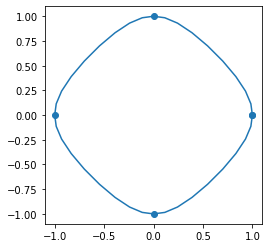

In [5]:
pts = np.array([[1,0],[0,1],[-1,0],[0,-1],[1,0]])
C_list = bezier_interpolate(pts,circle=True)
plot_pts = np.concatenate(tuple(C(np.linspace(0,math.pi/2,10)) for C in C_list))

plt.axes().set_aspect(1)
plt.scatter(pts[:,0],pts[:,1])
plt.plot(plot_pts[:,0],plot_pts[:,1])
plt.show()

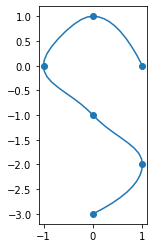

In [6]:
pts = np.array([[1,0],[0,1],[-1,0],[0,-1],[1,-2],[0,-3]])
C_list = bezier_interpolate(pts)
plot_pts = np.concatenate(tuple(C(np.linspace(0,math.pi/2,10)) for C in C_list))

plt.axes().set_aspect(1)
plt.scatter(pts[:,0],pts[:,1])
plt.plot(plot_pts[:,0],plot_pts[:,1])
plt.show()

In [7]:
C_list

[<function __main__.bezier_interpolate.<locals>.scaled_bezier.<locals>._scaled_bezier(theta)>,
 <function __main__.bezier_interpolate.<locals>.blend.<locals>._blend(theta)>,
 <function __main__.bezier_interpolate.<locals>.blend.<locals>._blend(theta)>,
 <function __main__.bezier_interpolate.<locals>.blend.<locals>._blend(theta)>,
 <function __main__.bezier_interpolate.<locals>._f_last(theta)>]